<a href="https://colab.research.google.com/github/Silver272/Micro-credential-pg/blob/main/Mini_Project_Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Overview

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks for patients with diabetes. It includes over 50 features representing patient and hospital outcomes.
Information was extracted from the database for encounters that satisfied the following criteria.
It is an inpatient encounter (a hospital admission).








# Task 2: Load the libraries





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

cf.go_offline()

# Task 3: Load the Data

In [2]:
diabetes_ds = pd.read_csv('https://raw.githubusercontent.com/Silver272/ML-Data/main/diabetic_data.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [3]:
diabetes_ds.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
list(diabetes_ds)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [5]:
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
diabetes_ds.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
diabetes_ds.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [8]:
diabetes_ds.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
diabetes_ds.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
diabetes_ds['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [11]:
diabetes_ds['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [12]:
diabetes_ds['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [13]:
diabetes_ds['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

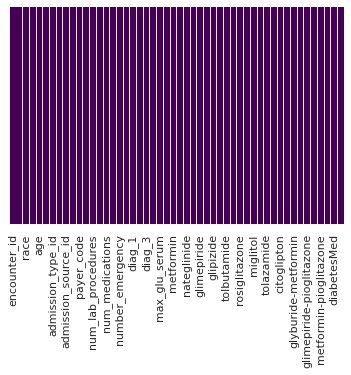

In [14]:
sns.heatmap(diabetes_ds.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# I dropped all non-int64 data types to enable model pass data
diabetes_ds = diabetes_ds.drop(['weight', 'patient_nbr','payer_code', 'medical_specialty',
                                'diag_1','diag_2','diag_3','max_glu_serum', 'A1Cresult',
                           'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
               'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
               'tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin',
           'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'], axis = 1)

# Change string variables to ints to enable models to pass data

In [16]:
diabetes_ds = diabetes_ds.replace({'NO':0,
                              '>30':1,
                              '<30':2})

In [17]:
diabetes_ds = diabetes_ds.replace({'Caucasian': 0,
                                  'AfricanAmerican':1,
                                  '?':2,
                                  'Other':3,
                                   'Asian':4,
                                   'Hispanic':5})

In [18]:
diabetes_ds = diabetes_ds.replace({'Female':1,
                                   'Male':2,
                                   'Unknown/Invalid':0})

In [19]:
diabetes_ds = diabetes_ds.replace(['[0-10)','[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'],(0,1,2,3,4,5,6,7,8,9))

In [20]:
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   race                      101766 non-null  int64
 2   gender                    101766 non-null  int64
 3   age                       101766 non-null  int64
 4   admission_type_id         101766 non-null  int64
 5   discharge_disposition_id  101766 non-null  int64
 6   admission_source_id       101766 non-null  int64
 7   time_in_hospital          101766 non-null  int64
 8   num_lab_procedures        101766 non-null  int64
 9   num_procedures            101766 non-null  int64
 10  num_medications           101766 non-null  int64
 11  number_outpatient         101766 non-null  int64
 12  number_emergency          101766 non-null  int64
 13  number_inpatient          101766 non-null  int64
 14  number_diagnoses    

# Task 5: Data Visualization

In [21]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

In [22]:
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

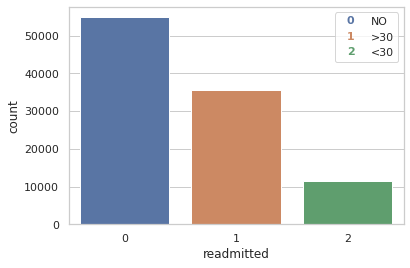

In [23]:
# Plot (readmitted), KEY 
sns.set_style('whitegrid')
ax = sns.countplot(x='readmitted', data=diabetes_ds)
handltext = ['0', '1', '2']
labels = ['NO', '>30', '<30']
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()

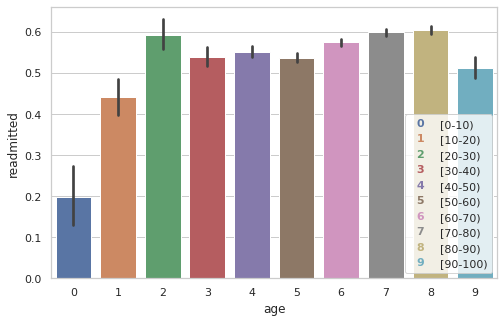

In [26]:
# plot (readmitted/age) 
plt.figure(figsize=(8,5))
ax = sns.barplot(x='age', y='readmitted', data=diabetes_ds)
handltext = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
labels = ['[0-10)','[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)']
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()

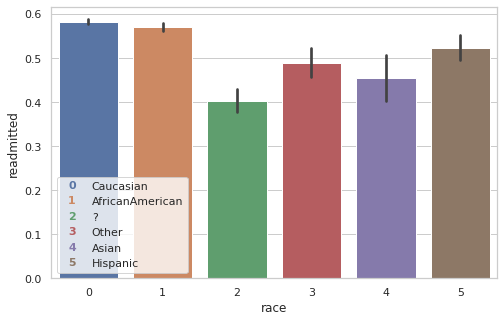

In [27]:
# plot (readmitted/race)
plt.figure(figsize=(8,5))
ax = sns.barplot(x='race', y='readmitted', data=diabetes_ds)
handltext = ['0', '1', '2', '3', '4', '5']
labels = ['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic']
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()

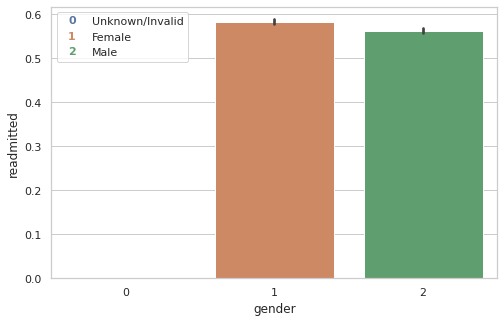

In [28]:
# plot (readmitted/gender)
plt.figure(figsize=(8,5))
ax = sns.barplot(x='gender', y='readmitted', data=diabetes_ds)
handltext = ['1', '2', '0']
labels = ['Female', 'Male', 'Unknown/Invalid']
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()

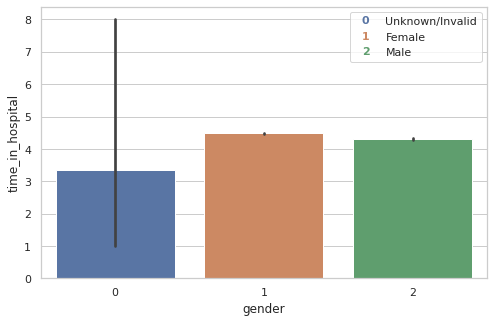

In [29]:
# plot (time_in_hospital/gender)
plt.figure(figsize=(8,5))
ax = sns.barplot(x='gender', y='time_in_hospital', data=diabetes_ds)
handltext = ['1', '2', '0']
labels = ['Female', 'Male', 'Unknown/Invalid']
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()

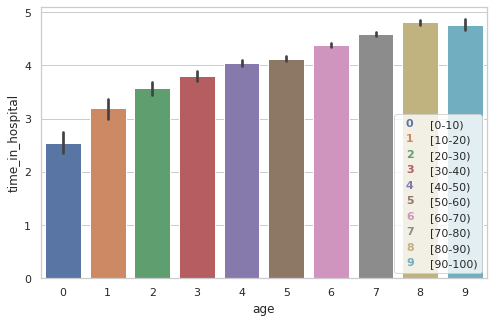

In [30]:
# plot (time_in_hospital/age)
plt.figure(figsize=(8,5))
ax = sns.barplot(x='age', y='time_in_hospital', data=diabetes_ds)
handltext = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
labels = ['[0-10)','[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)']
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()

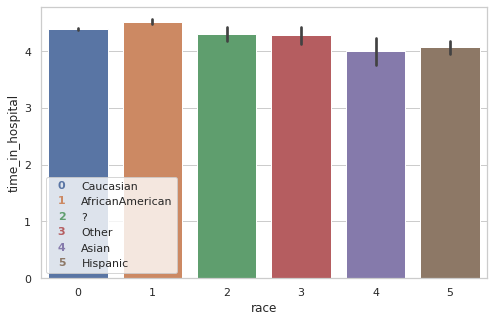

In [32]:
# plot (time_in_hospital/race)
plt.figure(figsize=(8,5))
ax = sns.barplot(x='race', y='time_in_hospital', data=diabetes_ds)
handltext = ['0', '1', '2', '3', '4', '5']
labels = ['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic']
t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()

# Scaler

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(diabetes_ds.drop(['readmitted'], axis = 1))

StandardScaler()

In [36]:
scaled_features = scaler.transform(diabetes_ds.drop('readmitted',axis=1))

In [37]:
scaled_features

array([[-1.58733032, -0.43723767, -0.92723179, ..., -0.21262018,
        -0.50327619, -3.3215959 ],
       [-1.60807473, -0.43723767, -0.92723179, ..., -0.21262018,
        -0.50327619,  0.81578448],
       [-1.60890073,  0.64742042, -0.92723179, ..., -0.21262018,
         0.28857905, -0.73573316],
       ...,
       [ 2.71485842, -0.43723767,  1.07822325, ..., -0.21262018,
        -0.50327619,  2.88447467],
       [ 2.71488782, -0.43723767, -0.92723179, ..., -0.21262018,
         0.28857905,  0.81578448],
       [ 2.71498579, -0.43723767,  1.07822325, ..., -0.21262018,
        -0.50327619,  0.81578448]])

In [38]:
# Data is Scaled now
diabetes_ds_feat = pd.DataFrame(scaled_features,columns=diabetes_ds.columns[:-1])
diabetes_ds_feat.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,-1.587330,-0.437238,-0.927232,-3.824600,2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
1,-1.608075,-0.437238,-0.927232,-3.197277,-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
2,-1.608901,0.647420,-0.927232,-2.569954,-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
3,-1.604653,-0.437238,1.078223,-1.942632,-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
4,-1.609366,-0.437238,1.078223,-1.315309,-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


# Task 6:Build Models

In [39]:
## Perform Train,Test Split
from sklearn.model_selection import train_test_split

In [40]:
readmitted = diabetes_ds['readmitted'].values.reshape(-1, 1)

In [41]:
X = diabetes_ds.drop('readmitted', axis = 1)
y = diabetes_ds['readmitted']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [43]:
# i will conduct a logistic regression
from sklearn.linear_model import LogisticRegression

In [44]:
# Create the model by assigning a variable the class pertaining to the model selected
logmodel = LogisticRegression()

In [45]:
 # Train the Model created by using the fit method
logmodel.fit(X_train,y_train)

LogisticRegression()

In [46]:
predictions = logmodel.predict(X_test)

# Task 7: Evaluate Models

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70     22076
           1       0.00      0.00      0.00     14185
           2       0.00      0.00      0.00      4446

    accuracy                           0.54     40707
   macro avg       0.18      0.33      0.23     40707
weighted avg       0.29      0.54      0.38     40707



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Task 10: Making Predictions

In [49]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print('readmitted: ', sum(pp!=0))
print('age: ', sum(pp==0))

0.5423145896283195
readmitted:  0
age:  40707


# Select Models

# KNN

In [ ]:
# Using KNN model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Start value of K at 1 (K=1)
knn = KNeighborsClassifier(n_neighbors=1) 

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
pred = knn.predict(X_test)

In [ ]:
# Now let's eveluate the model

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[9996 4991 1578]
 [4923 4292 1313]
 [1610 1314  513]]


In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55     22076
           1       0.36      0.36      0.36     14185
           2       0.11      0.11      0.11      4446

    accuracy                           0.43     40707
   macro avg       0.34      0.34      0.34     40707
weighted avg       0.44      0.43      0.44     40707



In [56]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [57]:
error_rate

[0.5658731913430123,
 0.4967204657675584,
 0.5182155403247599,
 0.5064239565676665,
 0.5038199818213084,
 0.49812071633871324,
 0.49812071633871324,
 0.4925197140540939,
 0.49126685827990274,
 0.4903087920996389,
 0.4879750411477142,
 0.4876802515537868,
 0.48350406563981624,
 0.4835777630382981,
 0.482742525855504,
 0.48333210504335866,
 0.4815142358808067,
 0.4820055518706856,
 0.48124401208637335,
 0.4805807355000368,
 0.47773110275873926,
 0.47738718156582405,
 0.47488147001744174,
 0.4763062863880905,
 0.47655194438302995,
 0.47591323359618737,
 0.47488147001744174,
 0.4746603778219962,
 0.47394796963667185,
 0.47387427223819,
 0.4736531800427445,
 0.4718844424791805,
 0.470754415702459,
 0.47053332350701355,
 0.4714422580882895,
 0.4706070209054954,
 0.4721301004741199,
 0.47077898150195296,
 0.4709509420984106]

Text(0.5, 0, 'Error Rate')

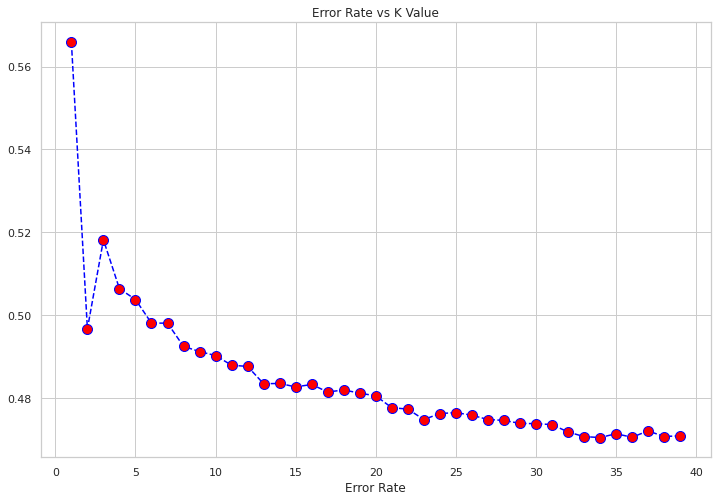

In [58]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('Error Rate')

In [59]:
knn = KNeighborsClassifier(n_neighbors=15)

In [60]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [61]:
print ('With k = 15')
print(confusion_matrix(y_test,pred))

With k = 15
[[17740  4282    54]
 [10834  3303    48]
 [ 3511   922    13]]


In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.80      0.66     22076
           1       0.39      0.23      0.29     14185
           2       0.11      0.00      0.01      4446

    accuracy                           0.52     40707
   macro avg       0.35      0.35      0.32     40707
weighted avg       0.45      0.52      0.46     40707



In [63]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print ('With k = 29')
print(confusion_matrix(y_test,pred))

With k = 29
[[18624  3450     2]
 [11390  2789     6]
 [ 3674   771     1]]


In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.84      0.67     22076
           1       0.40      0.20      0.26     14185
           2       0.11      0.00      0.00      4446

    accuracy                           0.53     40707
   macro avg       0.35      0.35      0.31     40707
weighted avg       0.45      0.53      0.45     40707



In [65]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print ('With k = 40')
print(confusion_matrix(y_test,pred))

With k = 40
[[19153  2923     0]
 [11798  2387     0]
 [ 3787   659     0]]


In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.55      0.87      0.67     22076
           1       0.40      0.17      0.24     14185
           2       0.00      0.00      0.00      4446

    accuracy                           0.53     40707
   macro avg       0.32      0.35      0.30     40707
weighted avg       0.44      0.53      0.45     40707



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# SVM

In [67]:
# SVM model
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [68]:
# Prediction
svc_pred = svc_model.predict(X_test)

In [69]:
# Accuracy score
svc_pred = svc_model.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[22076     0     0]
 [14185     0     0]
 [ 4446     0     0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70     22076
           1       0.00      0.00      0.00     14185
           2       0.00      0.00      0.00      4446

    accuracy                           0.54     40707
   macro avg       0.18      0.33      0.23     40707
weighted avg       0.29      0.54      0.38     40707



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Conclusion

The conclusion from model building was not straight forward. Both models were very close in the 50% range. The best model is KNN because prediction is 55%. 